#### Importing important libraries and datasets

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error

#### Loading the boston housing dataset


In [118]:
bhd = pd.read_csv('BostonHousing.csv')
print(bhd.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

#### Initialising X and y variables

In [119]:
X = bhd['rm'].to_numpy().reshape(-1,1)
y = bhd['medv'].to_numpy().reshape(-1,1)

#### Box Plot to visualise

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6bc2b7afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bc2b84690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6bc2b5c650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bc2b85d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bc2b86810>],
 'means': []}

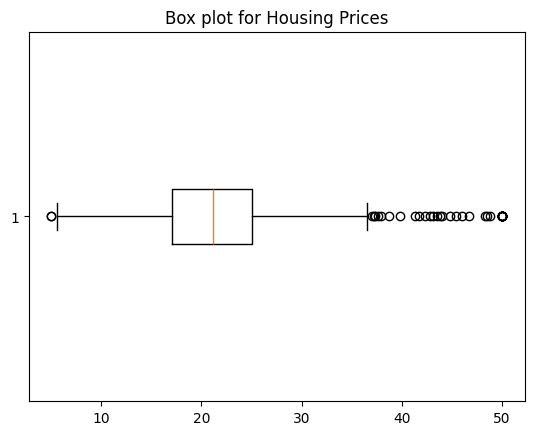

In [120]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for Housing Prices')
ax1.boxplot(y, vert=False)

#### Visualising Outliers using Scatterplot

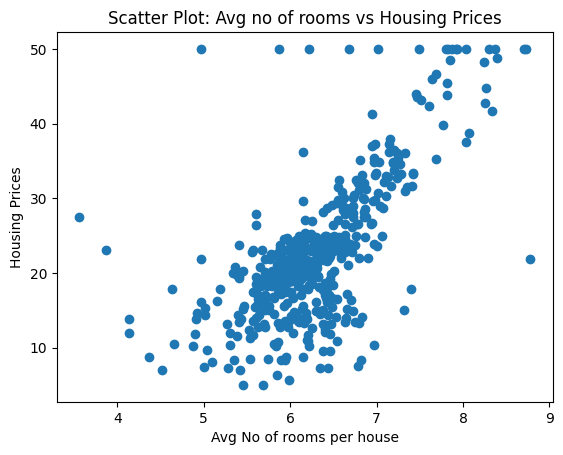

In [121]:
plt.xlabel("Avg No of rooms per house")
plt.ylabel("Housing Prices")
plt.title("Scatter Plot: Avg no of rooms vs Housing Prices")
plt.scatter(rooms, y)
plt.show()

#### Initialising the RANSAC model and fitting the values

In [122]:
ransac = RANSACRegressor(estimator=LinearRegression(),min_samples=50, max_trials=100, loss='absolute_error', random_state=42, residual_threshold=10)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=42,
                residual_threshold=10)

#### Create scatter plot for outlier datset


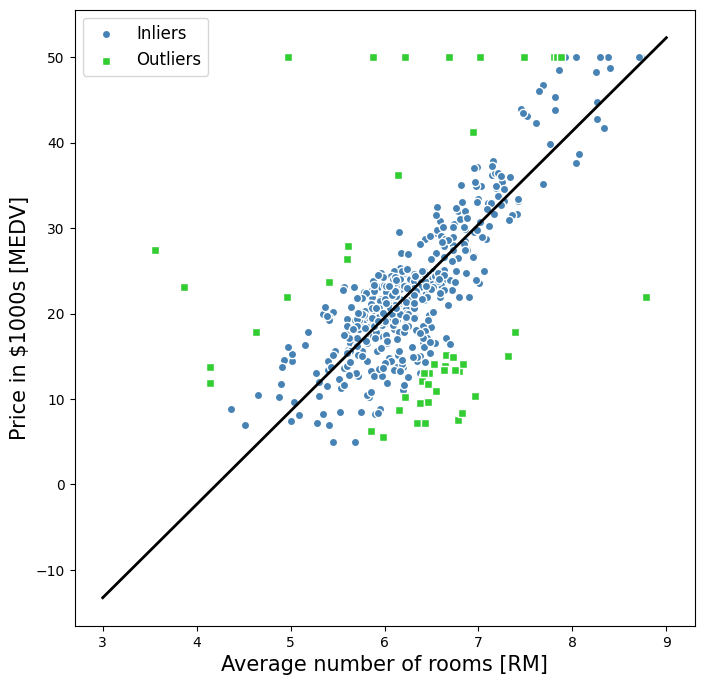

In [123]:
plt.figure(figsize=(8, 8)) 

inlier_mask = ransac.inlier_mask_ # Get the Inlier mask
outlier_mask = np.logical_not(inlier_mask) # Create outlier mask

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers') # Create scatter plot for inlier datset
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers') # Create scatter plot for outlier datset

# Draw the best fit line

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [MEDV]', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()